In [1]:
#
# Create a classifier for digits '1' and '0'
# 
# TRANSFER LEARNING Inception V3
# Shift the digit '1' to the left and to the right 
# Evaluate the model with shifted images
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/ml101/')
train_zero_dir = os.path.join(path_base+'/ml101/0/')
train_one_dir = os.path.join(path_base+'/ml101/1/')

# print directories with training images
print(train_zero_dir)
print(train_one_dir)

# print filename from each directory
train_zero_names = os.listdir(train_zero_dir)
print(train_zero_names[0])
train_one_names = os.listdir(train_one_dir)
print(train_one_names[0])

# print total training images
print("Total training zero images= ", len(os.listdir(train_zero_dir)))
print("Total training one images= ", len(os.listdir(train_one_dir)))

/home/watson/gittemp/ml-classifier-no-common-sense/ml101/0/
/home/watson/gittemp/ml-classifier-no-common-sense/ml101/1/
img_28894.jpg
img_36495.jpg
Total training zero images=  4132
Total training one images=  4684


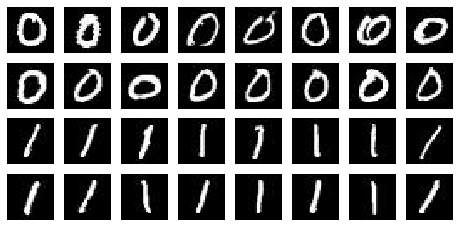

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_zero_dir, fname)
                for fname in train_zero_names[pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_one_dir, fname)
                for fname in train_one_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [3]:
#
# Transfer learning
#
import tensorflow as tf
print(tf.__version__)

import urllib.request

from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                               include_top=False,
                               weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

2.9.1
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                 

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
#
# TRANSFER LEARNING
#

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )

In [7]:
# Re RUN DATA AUGMENTATION with NORMALIZATION 
#(IF displaying the images will look all black from values between 0 to 1)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=33,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(path_base+'/ml101/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='binary')

Found 8816 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=3,
                   verbose=2)

Epoch 1/3
8/8 - 8s - loss: 0.0992 - accuracy: 0.9160 - 8s/epoch - 966ms/step
Epoch 2/3
8/8 - 6s - loss: 0.0034 - accuracy: 0.9980 - 6s/epoch - 720ms/step
Epoch 3/3
8/8 - 6s - loss: 0.0014 - accuracy: 0.9980 - 6s/epoch - 701ms/step


In [9]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image

def common(path_directory,path_split,expected=1):
    paths = []
    path = path_directory#train_one_dir#path_base+'imnist/1/'

    # setting the pahts to look for the images
    one_names = os.listdir(path)

    # show some images from '0'
    nrows, ncols = 8,8
    pic_index = 0

    fig = plt.gcf()
    fig.set_size_inches(ncols*1, nrows*1)

    pic_index += 16
    next_one__pix = [os.path.join(path, fname)
                    for fname in one_names[pic_index-16:pic_index]]

    for i, img_path in enumerate(next_one__pix):
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('on')

        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')

    plt.show()


    for f in os.listdir(path):
        paths.append(os.path.join(path,f))

    #from skimage import io

    i=0
    c_zero=0
    c_one=0
    for path in paths:
        img = image.load_img(path, target_size=(150,150,3))#(28,28))
        

        x = image.img_to_array(img)
        x = x/255.0
        #print(np.amin(x),np.amax(x))
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        path_dir = path.split(path_split)#"ml101/")
        if classes[0]>=0.5:
            print("=[1]   ",end="")
        else:
            print("=[0]   ",end="")
        if expected==1 and classes[0]<0.5:
            c_zero+=1
            print("xxx = ",str(c_zero))
        
        if expected==0 and classes[0]>0.5:
            c_one+=1
            print("xxx = ",str(c_one))
            
        print(classes[0], path_dir[1])
        i+=1
        if i>=16:
            break

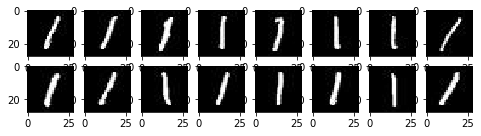

1/1 [==============================] - 1s 693ms/step
=[1]   [1.] 1/img_36495.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] 1/img_23229.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_31935.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_2549.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_7556.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_23019.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] 1/img_28693.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] 1/img_342.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_35081.jpg
1/1 [==============================] - 0s 35ms/step
=[1]   [1.] 1/img_1570.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] 1/img_23463.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] 1/img_5263.jpg
1/1 [==============================] - 0s 32m

In [10]:
#
# Evaluate test images with ONEs
#
common(train_one_dir,"ml101/")

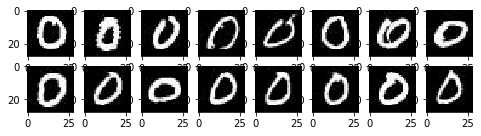

1/1 [==============================] - 0s 31ms/step
=[0]   [5.0459526e-17] 0/img_28894.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [3.6424832e-11] 0/img_18260.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.6517799e-16] 0/img_14179.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.4687299e-14] 0/img_129.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.1277365e-15] 0/img_1729.jpg
1/1 [==============================] - 0s 32ms/step
=[0]   [1.41534665e-14] 0/img_38201.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [1.5844058e-14] 0/img_403.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [8.810434e-17] 0/img_1544.jpg
1/1 [==============================] - 0s 33ms/step
=[0]   [1.5806967e-17] 0/img_35946.jpg
1/1 [==============================] - 0s 34ms/step
=[0]   [8.549232e-19] 0/img_18729.jpg
1/1 [==============================] - 0s 35ms/step
=[0]   [4.0308955e-17] 0/img_38113.jpg
1/1 [=

In [11]:
#
# Evaluate test images with ZEROs
#
common(train_zero_dir,"ml101/",0)

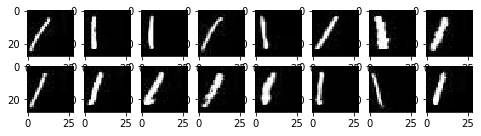

1/1 [==============================] - 0s 30ms/step
=[1]   [0.9966507] img_342.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9991455] img_2.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.9950053] img_527.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9885301] img_255.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.9982039] img_295.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [0.99999636] img_249.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99856955] img_549.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.9778402] img_152.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99979794] img_468.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [0.99917984] img_68.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [0.8571077] img_185.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [0.98815596] img_134.jpg
1/

In [12]:
#
# ONEs shifted to the left
#
common(path_base+'/sl1/',"sl1/")

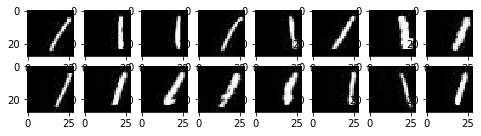

1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_342.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_2.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] img_527.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] img_255.jpg
1/1 [==============================] - 0s 33ms/step
=[1]   [1.] img_295.jpg
1/1 [==============================] - 0s 32ms/step
=[1]   [1.] img_249.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] img_549.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] img_152.jpg
1/1 [==============================] - 0s 34ms/step
=[1]   [1.] img_468.jpg
1/1 [==============================] - 0s 31ms/step
=[1]   [1.] img_68.jpg
1/1 [==============================] - 0s 37ms/step
=[1]   [1.] img_185.jpg
1/1 [==============================] - 0s 39ms/step
=[1]   [1.] img_134.jpg
1/1 [==============================] - 0s 36ms/step
=[1]   [1.] img_594.jpg
1/1 [==========

In [13]:
#
# ONEs shifted to the right
#
common(path_base+'/sr1/',"sr1/")

1/1 [==============================] - 0s 32ms/step
[1.]


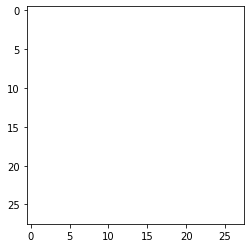

In [14]:
#
# A white image is 100% sure that is a ZERO
#
path = path_base+'/x/img_white.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(150,150))#(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 34ms/step
[1.]


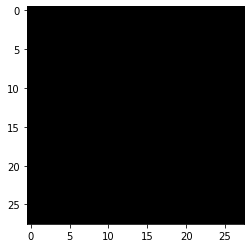

In [15]:
#
# A black image is a ONE
#
path = path_base+'/x/img_black.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(150,150))#(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 35ms/step
[0.0001871]


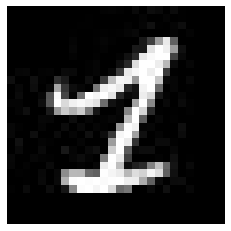

In [17]:
#
# Test with images from the training set
#
path = path_base+'/ml101/1/img_23039.jpg'

img = mpimg.imread(path)
plt.axis('off')
plt.imshow(img, cmap='gray')

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

1/1 [==============================] - 0s 43ms/step
[9.743553e-05]


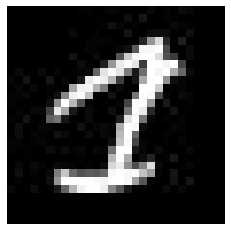

In [18]:
#
# Test with images from the training set
#
path = path_base+'/ml101/1/img_4789.jpg'

img = mpimg.imread(path)
plt.axis('off')
plt.imshow(img, cmap='gray')

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])